In [ ]:
#Objective is to predict the profit of startup

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
df = pd.read_csv(r'C:\Users\choco\OneDrive\Desktop\python\50_Startups.csv')
df.head(1)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.2,136897.8,471784.1,New York,192261.83


In [7]:
df.shape

(50, 5)

In [8]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [9]:
df['State'].value_counts()
#total 50 values

State
New York      17
California    17
Florida       16
Name: count, dtype: int64

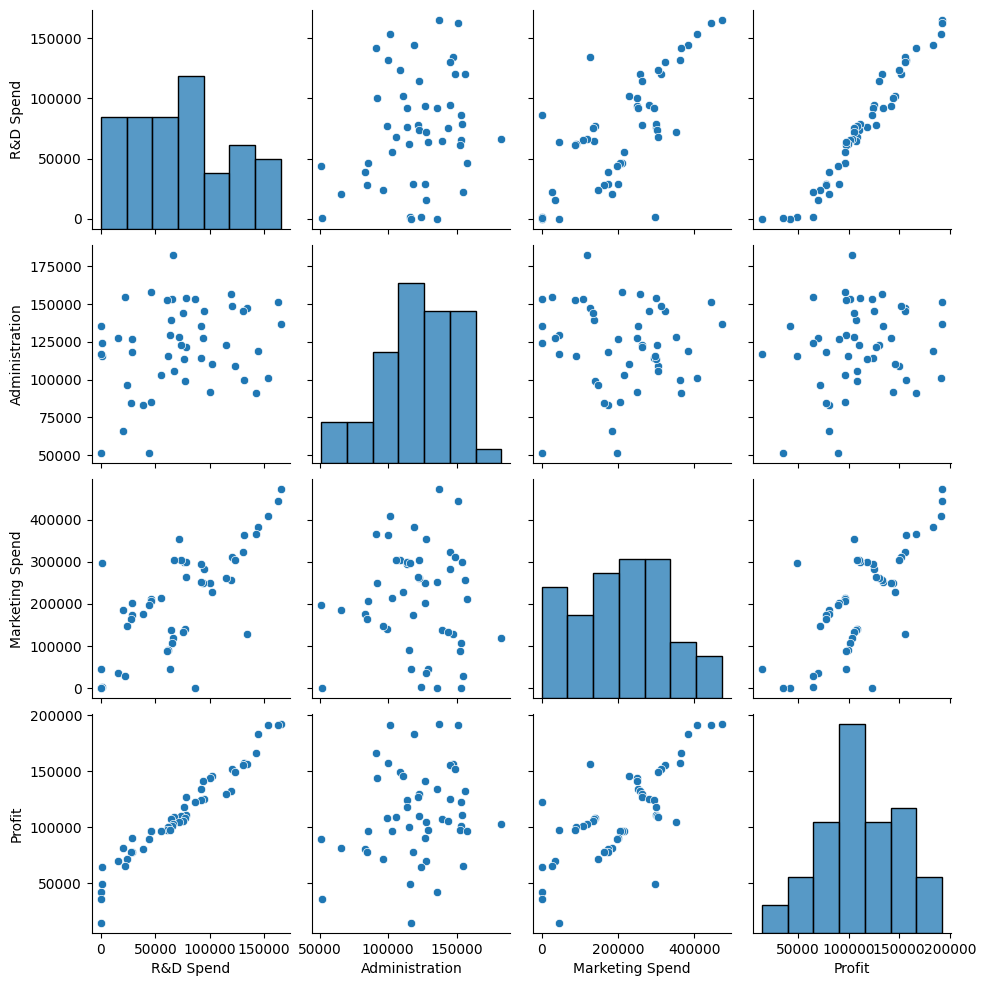

In [13]:
sns.pairplot(df)

In [14]:
!pip install category_encoders

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   -----------------

ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\choco\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\scipy\\cluster\\_hierarchy.cp312-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [ ]:
#Data pre processing steps
#1.Encoding process
#we change the object value to numerical or boolean values for the machine to understand

In [10]:
import category_encoders as ce
encoder=ce.OneHotEncoder(cols='State')
df=encoder.fit_transform(df)
df.head(2)
#We will use One Hot Encoder which is a package of category encoders

,R&D Spend,Administration,Marketing Spend,State_1,State_2,State_3,Profit
0,165349.2,136897.80,471784.10,1,0,0,192261.83
1,162597.7,151377.59,443898.53,0,1,0,191792.06


In [11]:
#2.Split the dataset into input features and target column

In [12]:
x=df.drop('Profit',axis=1)#we are not taking profit as it is target column
y=df['Profit']
x.head(2)

,R&D Spend,Administration,Marketing Spend,State_1,State_2,State_3
0,165349.2,136897.80,471784.10,1,0,0
1,162597.7,151377.59,443898.53,0,1,0


In [13]:
#3.Scaling the input feature data for quicker processing

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[1.        , 0.65174393, 1.        , 1.        , 0.        ,
        0.        ],
       [0.98335946, 0.76197173, 0.94089337, 0.        , 1.        ,
        0.        ],
       [0.92798459, 0.37957895, 0.8646636 , 0.        , 0.        ,
        1.        ],
       [0.87313643, 0.51299839, 0.81223513, 1.        , 0.        ,
        0.        ],
       [0.85943772, 0.30532804, 0.77613557, 0.        , 0.        ,
        1.        ],
       [0.797566  , 0.3694479 , 0.76912588, 1.        , 0.        ,
        0.        ],
       [0.81412828, 0.73016111, 0.27071031, 0.        , 1.        ,
        0.        ],
       [0.7880179 , 0.71745725, 0.68649342, 0.        , 0.        ,
        1.        ],
       [0.72901786, 0.74173276, 0.66049977, 1.        , 0.        ,
        0.        ],
       [0.74590551, 0.43692884, 0.64644319, 0.        , 1.        ,
        0.        ],
       [0.61635061, 0.45150637, 0.48573267, 0.        , 0.        ,
        1.        ],
       [0.60884455, 0

In [15]:
#the value we got is an array and we have to convert it to DataFrame

In [18]:
x_scaled=pd.DataFrame(x_scaled,columns=x.columns)
x_scaled.head()

,R&D Spend,Administration,Marketing Spend,State_1,State_2,State_3
0,1.000000,0.651744,1.000000,1.0,0.0,0.0
1,0.983359,0.761972,0.940893,0.0,1.0,0.0
2,0.927985,0.379579,0.864664,0.0,0.0,1.0
3,0.873136,0.512998,0.812235,1.0,0.0,0.0
4,0.859438,0.305328,0.776136,0.0,0.0,1.0


In [19]:
#4. Divide the dataset into train dataset and test data set

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=0)
#test size determines the split of data state. 100-25 =75(test data set will take 75% of the data set and remaining 25% will go to testing)
#random_state while taking rows it takes it constant value or position of rows is taken everytime
#imagine 2 people give same random state, the rows taken by the module train_test_split will also be the same rows for training and testing for both person

In [21]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((37, 6), (13, 6), (37,), (13,))

In [22]:
#Apply ML Algo into training data
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [24]:
y_pred=model.predict(x_test)
y_pred
#we predict the y values by giving it the data of x test

array([104440.72582616, 132253.81567698, 132872.07174272,  71707.78771428,
       178678.9934985 , 115078.13124331,  66093.9297267 ,  98759.7276409 ,
       114113.5994088 , 167979.49411476,  95786.77295823,  87785.3497979 ,
       110455.98228344])

In [27]:
y_test[:5]

28    103282.38
11    144259.40
10    146121.95
41     77798.83
2     191050.39
Name: Profit, dtype: float64

In [28]:
#Model Evalutation

In [40]:
model.score(x_test,y_test)
#Another method or test accuracy
#it tests the accuracy score by comparing the same x training dataset again with true values to the ones model predicted

0.9315815199152048

In [41]:
model.score(x_train,y_train)
#test_accuracy
#it tests the accuracy of the model by compaering it with the testing data set

0.9511705268907698

In [43]:
model.coef_
#coefficients are the input data that are given like b1,b2,b3,b4,b5 and b6

array([129136.16906838,   6016.08638233,  15824.58409654,    181.36325093,
          170.21205364,   -351.57530456])

In [30]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error
r2_score(y_test,y_pred)
#r2 indicates how well the models approximate the actual data points

0.9315815199152048

In [34]:
mean_absolute_error(y_test,y_pred)
#mae is a measure of the average of the absolute difference between each actual and predicted value

7024.539954004433

In [35]:
mean_squared_error(y_test,y_pred)
#Takes the average of the square of the difference between the original value and the predicted value

73809312.88230242

In [36]:
root_mean_squared_error(y_test,y_pred)
#RMSE represents the square root of the average squared differences between predicted and observed outcomes.
#It is a metric predominantly utilized in regression analysis and forecasting,
#where accuracy matters significantly. The lower the RMSE, the better the model's ability to predict accurately.

8591.234654128732